# Ejercicios de clase 06: Numpy y álgebra lineal

**Curso:** Ciencia de Datos en Python

**Catedrático:** Ing. Luis Leal

**Estudiante:** Dany Rafael Díaz Lux (21000864)

**Instrucciones:** Resolver ejercicios indicados en clase en notebook: Clase06 Numpy y álgebra lineal.

**Fecha de entrega:** Marzo 2021

In [1]:
import numpy as np

**(1) ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [4]:
# Se crean tres vectores diferentes con su "paso" deseado para cada uno
primero = np.linspace(0, 0.5, 6, endpoint=True)
segundo = np.linspace(0.51, 0.6, 10, endpoint=True)
tercero = np.linspace(0.7, 1, 4, endpoint=True)
# Se unen los tres vectores anteriores en un solo vector
xs = np.hstack((primero, segundo, tercero))
print(xs)

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


**Explicación y código previo al ejercicio 2**

In [6]:
# Importar matplotlib para posteriores ejercicios
import matplotlib.pyplot as plt

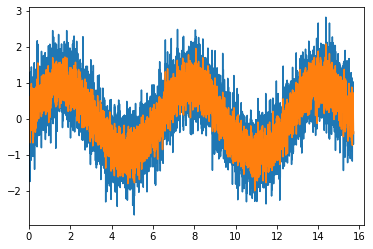

In [7]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1): #5
    ys[n] = (y[n-1] + y[n] + y[n+1])/3
    
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

**(2) Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

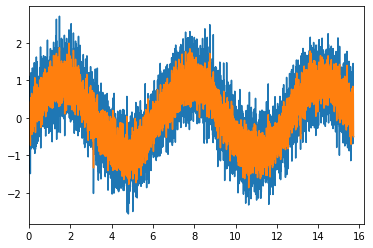

In [33]:
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

# Calculos "vectorizados" en lugar de ciclos
# Vector desde primer elemento hasta antepenúltimo
y1 = y[:-2].copy()
# Vector desde segundo elemento hasta penúltimo
y2 = y[1:-1].copy()
# Vector desde tercer elemento hasta último
y3 = y[2:].copy()
# Vector que tendrá las medias suavizadas desde segundo elemento hasta penúltimo
yn = (y1 + y2 + y3) / 3
# Formando el vector completo suavizado
ys = np.hstack((y[:1], yn, y[-1:]))

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

**(3) Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [35]:
# función calcular_entropia
def calcular_entropia(px):
    return px * np.log2(px) * -1

# Ejecutar datos de ejemplo
print(calcular_entropia([0.25, 0.75]))

[0.5        0.31127812]


**Explicación y código previo al ejercicio 4**

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

In [36]:
def g(x): #<- vector
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**(4) Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [40]:
def costos(x):
  return (np.power(x,2) + x + np.log(0.0001 * x) - np.sqrt(0.54 * x))/100

def ganancia_neta(x,g,c):
  return g(x) - c(x)

print(ganancia_neta(gastos,g,costos))

[20298.85689469  2574.42504495   330.9752857  20298.85689469]


**(5) lifetime value**

In [41]:
def lifetime_value(ganancias_mensuales):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


**(6) Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [86]:
# Función que devolverá la moda de los valores en un vector
# Consideración: Si no hay sólo un valor más veces repetido, se devolverá un vector vacío
def mode(x):
    vector_no_repetido,indices,conteos = np.unique(x, return_index=True, return_counts=True)
    if len(np.argwhere(conteos == conteos.max())) > 1:
        return []
    else:
        return vector_no_repetido[conteos.argmax()]

x1 = [1,2,3,4,5,2,7,8,9,8,7,9,2,9,2] # Valor 2 es el número más veces repetido
x2 = [1,2,3,4,5,2,7,8,9,8,7,9,2,9] # No hay sólo un valor más repetido, se devolverá vector vacío
print(mode(x1))
print(mode(x2))

2
[]


**(7) Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [87]:
# función definida anteriormente, definida nuevamente como referencia.
def calcular_entropia(px):
    return px * np.log2(px) * -1

def sumatoria_entropia(px):
    return np.sum(calcular_entropia(px))

# Ejecutar datos de ejemplo
print(sumatoria_entropia([0.25, 0.75]))

0.8112781244591328


**(8) Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [94]:
def cross_entropy(Y,Y_hat):
    return np.sum(Y*np.log((Y_hat + 1e-15))*-1) # Añadimos un valor muy pequeño a Y_hat (1e-15), para evitar que log = inf, si es cero.    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo
print(cross_entropy(y,y_hat))

0.356674943938731


**(9) ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [99]:
def magnitud(x):
    return np.sqrt(np.sum(np.power(x,2)))

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

# elegir el mejor modelo con una condicional(if)
if magnitud(errores_modelo1) < magnitud(errores_modelo2):
    print('Modelo 1 es mejor, errores:', errores_modelo1, ', magnitud: ', magnitud(errores_modelo1))
else:
    print('Modelo 2 es mejor, errores:', errores_modelo2, ', magnitud: ', magnitud(errores_modelo2))

Modelo 2 es mejor, errores: [0 1 1 2] , magnitud:  2.449489742783178


**(10) ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [102]:
def normalizar(x):
    return x / magnitud(x)

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


**(11) Ejercicio aplicado en DS**

Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [104]:
# Aplicar la red neuronal sobre los siguientes datos X
X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
x4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

def aplicarRedNeuronal(x):
    hl1 = np.array([0.25, 0.37])
    hl2 = np.array([-8.0, 14.0])
    ol = np.array([4.0, 9.0])
    
    hlr1 = np.dot(x, hl1)
    hlr2 = np.dot(x, hl2)
    
    hlt = np.array([hlr1, hlr2])
    output = np.dot(hlt, ol)
    
    return output

# Resultados a red neuronal de los datos X
print('Resultado de red neuronal aplicado a X1:', aplicarRedNeuronal(X1))
print('Resultado de red neuronal aplicado a X2:', aplicarRedNeuronal(X2))
print('Resultado de red neuronal aplicado a X3:', aplicarRedNeuronal(X3))
print('Resultado de red neuronal aplicado a x4:', aplicarRedNeuronal(x4))
print('Resultado de red neuronal aplicado a X5:', aplicarRedNeuronal(X5))

Resultado de red neuronal aplicado a X1: 56.2856
Resultado de red neuronal aplicado a X2: 1176.36
Resultado de red neuronal aplicado a X3: 0.0
Resultado de red neuronal aplicado a x4: 56.48
Resultado de red neuronal aplicado a X5: -33.67473781561768


**(12) Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

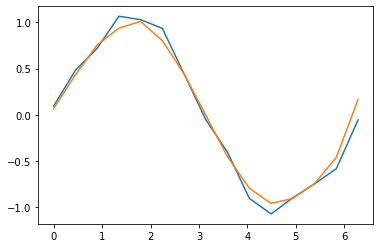

In [106]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada
ys = np.empty(len(y))

# (No se encontró una función que creara arreglos de dimensión tres para realizar producto punto con filtro, sin iterar)
for i in range(1,len(y)-1):
    ys[i] = np.dot(np.array([y[i-1], y[i], y[i+1]]), filtro)
    
plt.plot(x,y)
plt.plot(x,ys)
plt.show()

**(13) Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [109]:
x = np.linspace(-2,2,9)

# Copiar vector 
z = x.copy()
# Multiplicar por -1 aquellos que son menores a cero
z[z<0] *= -1
# Imprimir resultado
print(x)
print(z)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


**(14) ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [129]:
def h(x):
    h = x.copy()
    h[(h<0)|(h>1)] = -1
    h[(h>=0)&(h<=1)] = 1
    h[h==-1] = 0
    return h

x = np.array([0.1,-2,0.5,5])
print(x)
print(h(x))

[ 0.1 -2.   0.5  5. ]
[1. 0. 1. 0.]


**(15) Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [131]:
x = np.linspace(-3,5,30)
condiciones = [x<0, (x>=0) & (x<1), (x>=1) & (x<2)]
resultados =  [x*-1, x**3, x**2]
k = np.select(condiciones,resultados,4)

print(x)
print(k)

[-3.         -2.72413793 -2.44827586 -2.17241379 -1.89655172 -1.62068966
 -1.34482759 -1.06896552 -0.79310345 -0.51724138 -0.24137931  0.03448276
  0.31034483  0.5862069   0.86206897  1.13793103  1.4137931   1.68965517
  1.96551724  2.24137931  2.51724138  2.79310345  3.06896552  3.34482759
  3.62068966  3.89655172  4.17241379  4.44827586  4.72413793  5.        ]
[3.00000000e+00 2.72413793e+00 2.44827586e+00 2.17241379e+00
 1.89655172e+00 1.62068966e+00 1.34482759e+00 1.06896552e+00
 7.93103448e-01 5.17241379e-01 2.41379310e-01 4.10020911e-05
 2.98905244e-02 2.01443274e-01 6.40657674e-01 1.29488704e+00
 1.99881094e+00 2.85493460e+00 3.86325803e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00]


##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**(16) Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [132]:
# Función anterior
x = np.linspace(-3,5,30)
condiciones = [x<0, (x>=0) & (x<1), (x>=1) & (x<2)]
resultados =  [lambda x:x*-1, lambda x:x**3, lambda x:x**2, 4]
k = np.piecewise(x, condiciones,resultados)

print(x)
print(k)

[-3.         -2.72413793 -2.44827586 -2.17241379 -1.89655172 -1.62068966
 -1.34482759 -1.06896552 -0.79310345 -0.51724138 -0.24137931  0.03448276
  0.31034483  0.5862069   0.86206897  1.13793103  1.4137931   1.68965517
  1.96551724  2.24137931  2.51724138  2.79310345  3.06896552  3.34482759
  3.62068966  3.89655172  4.17241379  4.44827586  4.72413793  5.        ]
[3.00000000e+00 2.72413793e+00 2.44827586e+00 2.17241379e+00
 1.89655172e+00 1.62068966e+00 1.34482759e+00 1.06896552e+00
 7.93103448e-01 5.17241379e-01 2.41379310e-01 4.10020911e-05
 2.98905244e-02 2.01443274e-01 6.40657674e-01 1.29488704e+00
 1.99881094e+00 2.85493460e+00 3.86325803e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00]


In [133]:
# Función actual
x = np.linspace(-3,5,30)
condiciones = [x<0, (x>=0) & (x<1), x>=1]
resultados =  [lambda x:np.power(np.e,x*2), 1, lambda x:np.power(np.e,1-x)]
k = np.piecewise(x, condiciones,resultados)

print(x)
print(k)

[-3.         -2.72413793 -2.44827586 -2.17241379 -1.89655172 -1.62068966
 -1.34482759 -1.06896552 -0.79310345 -0.51724138 -0.24137931  0.03448276
  0.31034483  0.5862069   0.86206897  1.13793103  1.4137931   1.68965517
  1.96551724  2.24137931  2.51724138  2.79310345  3.06896552  3.34482759
  3.62068966  3.89655172  4.17241379  4.44827586  4.72413793  5.        ]
[0.00247875 0.00430372 0.00747231 0.01297374 0.02252559 0.03910991
 0.06790435 0.11789852 0.20470059 0.35541017 0.61707876 1.
 1.         1.         1.         0.87115877 0.66113772 0.50174906
 0.38078619 0.28898534 0.21931606 0.16644282 0.12631639 0.09586373
 0.07275267 0.05521328 0.04190233 0.03180042 0.0241339  0.01831564]


## Proyección vectorial

**Interpretación:** Gráficamente, podría describirse la proyección vectorial como el vector que se consiguiría si un vector **u**, se extendiera sobre otro vector **v** trazando una línea perpendicular al vector **v** hacia el final del vector **u**. En este caso sería el vector remarcado en verde como lo muestra la siguiente imagen:

<img src="https://ekuatio.com/wp-content/uploads/proyeccion-vectores-3.png">

Imagen de página: [Proyección de un vector sobre otro vector](https://ekuatio.com/proyeccion-de-un-vector-sobre-otro-vector-ejercicios-resueltos/#:~:text=En%20el%20caso%20de%20la,vector%20unitario%20del%20vector%20v.&text=Al%20dividir%20un%20vector%20entre,que%20es%20un%20vector%20unitario.)

Y para conseguir dicha proyección se usaría la siguiente fórmula:

<img src="https://ekuatio.com/wp-content/uploads/proyeccion-vectores-23.png">

Fórmula también de: [Proyección de un vector sobre otro vector](https://ekuatio.com/proyeccion-de-un-vector-sobre-otro-vector-ejercicios-resueltos/#:~:text=En%20el%20caso%20de%20la,vector%20unitario%20del%20vector%20v.&text=Al%20dividir%20un%20vector%20entre,que%20es%20un%20vector%20unitario.)

In [140]:
# Definición de función para cálculo
def proyeccion_vectorial(x,y):
    puntoxy = np.dot(x,y)
    puntoyy = np.dot(y,y)
    return (puntoxy / puntoyy) * y

u = np.array([2,0])
v = np.array([3,-4])
# Mostrar proyecciones, notar que los resultados son diferentes
print('Proyección de vector u en v:', proyeccion_vectorial(u,v))
print('Proyección de vector v en u:', proyeccion_vectorial(v,u))

Proyección de vector u en v: [ 0.72 -0.96]
Proyección de vector v en u: [3. 0.]


**Aplicación o caso de uso:** La proyección vectorial es utilizada en el proceso **Gram-Schmidt** que es utilizado para crear una base de vectores ortogonal y normalizada.

## Producto cruz

**Interpretación:** El producto cruz de dos vectores **A** y **B** se define como el vector perpendicular a estos dos vectores cuya magnitud es igual al área del paralelograma que **A** y **B** forman (siendo cero si los vectores son paralelos) y cuya dirección está definida por la regla de la mano derecha, como se puede ver en la siguiente imagen:

<img src="http://mechanicsmap.psu.edu/websites/A1_vector_math/crossproduct/images/crossproduct.png">

In [142]:
# Definición de función para cálculo

def producto_cruz(x,y):
    return np.cross(x,y)

a = np.array([2,0,1])
b = np.array([1,-1,3])
c = np.array([1,2])
d = np.array([4,5])

print('Producto cruz de a y b: ', producto_cruz(a,b))
print('Producto cruz de c y d: ', producto_cruz(c,d))

Producto cruz de a y b:  [ 1 -5 -2]
Producto cruz de c y d:  -3


**Aplicación o caso de uso:** El producto cruz puede ser utilizado para calcular la normal de un triángulo o polígono, cálculo que es realizado normalmente para **gráficas en un computador**.